Exploratory data analysis

### Imports and logging

In [3]:
# imports needed and set up logging
import gzip
import logging

import numpy as np
import pandas as pd

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Dataset 
I use data from the [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset and place them in the data subfolder.


In [4]:
df_train = pd.read_csv('data/train.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('data/test.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df_test_price = pd.read_csv('data/sample_submission.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

In [5]:
df_train

print( df_train.shape )
null_columns=df_train.columns[df_train.isnull().any()]
print ( df_train[null_columns].isnull().sum() )


(1460, 81)
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [29]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### MSSubClass vs. SalePrice

MSSubClass: Identifies the type of dwelling involved in the sale. (**No missing values**)	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

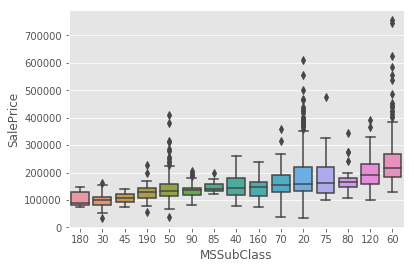

In [73]:
orderIdx = df_train.groupby("MSSubClass").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["MSSubClass"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### MSZoning vs. SalePrice

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

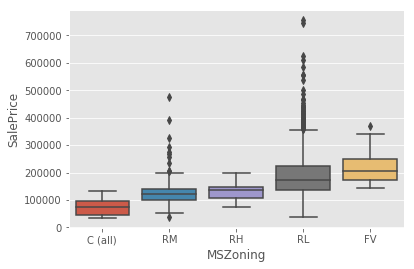

In [75]:
orderIdx = df_train.groupby("MSZoning").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["MSZoning"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### LotFrontage vs. SalePrice

LotFrontage: Linear feet of street connected to property

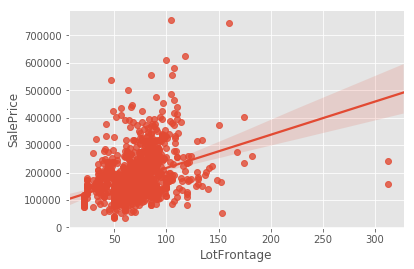

In [52]:
sns.regplot(x="LotFrontage", y="SalePrice", data=df_train)

### LotArea vs. SalePrice

LotArea: Lot size in square feet

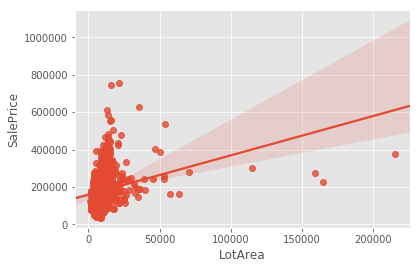

In [53]:
sns.regplot(x="LotArea", y="SalePrice", data=df_train)

### Street vs. SalePrice
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

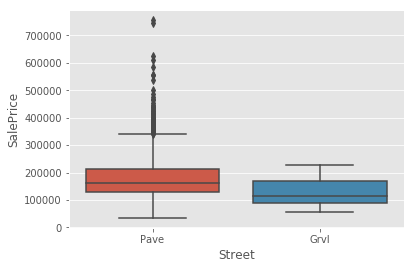

In [54]:
sns.boxplot( x=df_train["Street"], y=df_train["SalePrice"] )

### Alley vs. SalePrice

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

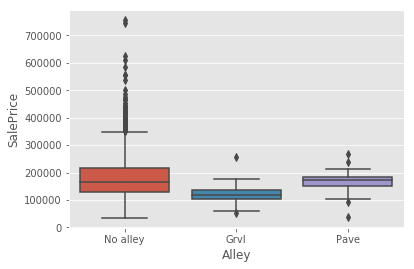

In [47]:
df_train["Alley"] =  df_train["Alley"].fillna("No alley")
df_test["Alley"] =  df_test["Alley"].fillna("No alley")    # fill in the test set info
sns.boxplot( x=df_train["Alley"], y=df_train["SalePrice"] )

### LotShape vs.SalePrice

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

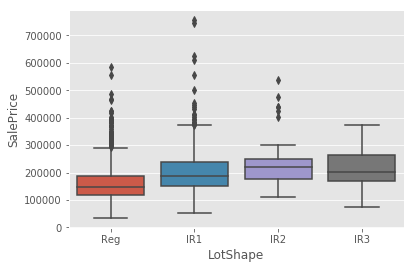

In [48]:
sns.boxplot( x=df_train["LotShape"], y=df_train["SalePrice"] )

### LandContour vs. SalePrice
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

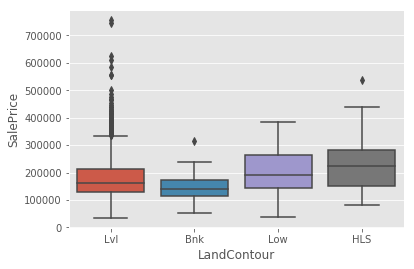

In [55]:
sns.boxplot( x=df_train["LandContour"], y=df_train["SalePrice"] )

### Utilities vs. SalePrice
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

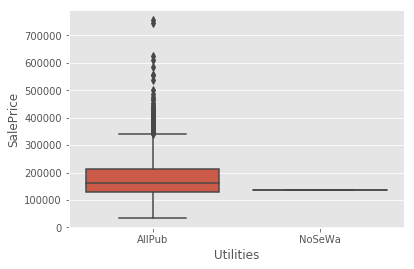

In [56]:
sns.boxplot( x=df_train["Utilities"], y=df_train["SalePrice"] )  #Didn't see all 4 categories.

### LotConfig vs. SalePrice

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

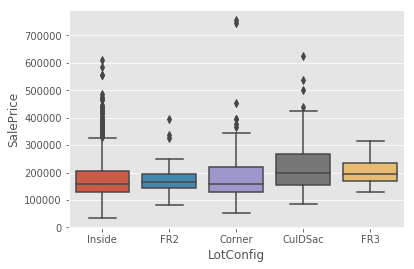

In [57]:
sns.boxplot( x=df_train["LotConfig"], y=df_train["SalePrice"] ) 

### LandSlope vs. SalePrice
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

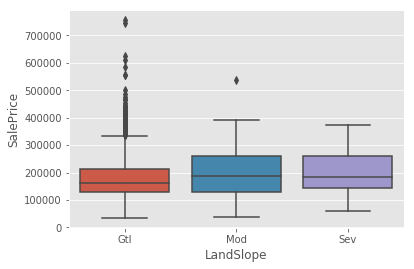

In [58]:
sns.boxplot( x=df_train["LandSlope"], y=df_train["SalePrice"] ) 

### Neighborhood vs. SalePrice
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

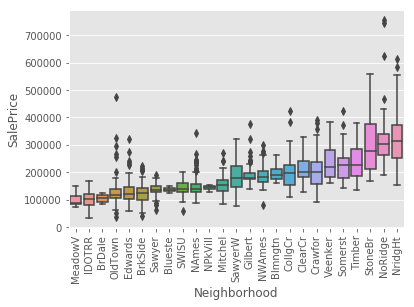

In [70]:
orderIdx = df_train.groupby("Neighborhood").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Neighborhood"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### Condition1, Condition2 vs. SalePrice

Condition1, Condition2: Proximity to various conditions
Condition2 is the additional condition of the house.
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

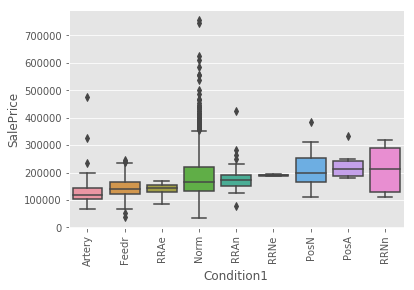

In [71]:
orderIdx = df_train.groupby("Condition1").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Condition1"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### BldgType vs. SalePrice

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

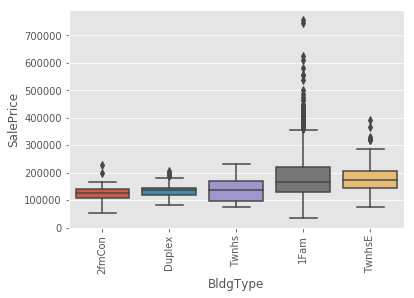

In [76]:
orderIdx = df_train.groupby("BldgType").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BldgType"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### HouseStyle vs. SalePrice

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

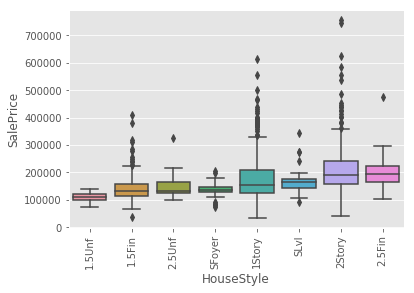

In [77]:
orderIdx = df_train.groupby("HouseStyle").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["HouseStyle"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### OverallQual vs. SalePrice
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

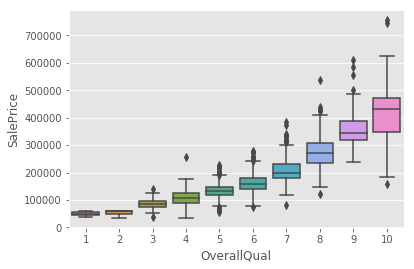

In [79]:
orderIdx = df_train.groupby("OverallQual").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["OverallQual"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### OverallCond vs. SalePrice
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

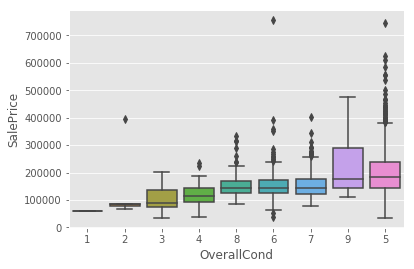

In [80]:
orderIdx = df_train.groupby("OverallCond").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["OverallCond"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

## Look like binary partition above average is enough.

### YearBuilt vs. SalePrice
YearBuilt: Original construction date

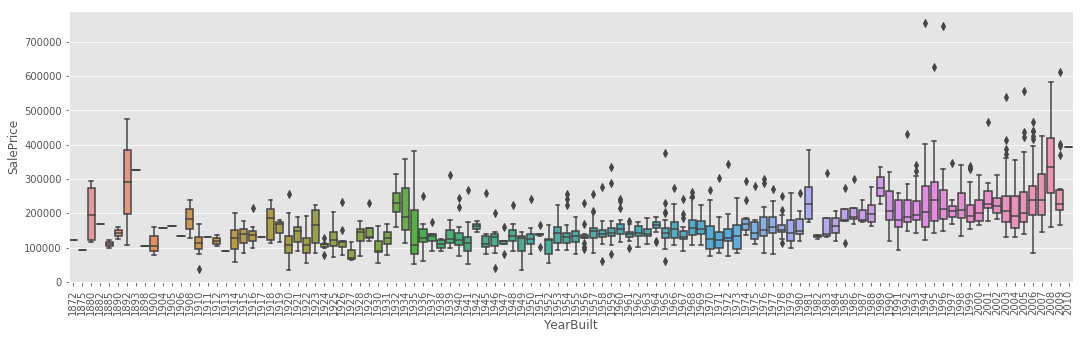

In [90]:
plt.rcParams['figure.figsize'] = 18,5
sns.boxplot( x=df_train["YearBuilt"], y=df_train["SalePrice"] ) 
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = 5,5

### YearRemodAdd vs. SalePrice
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

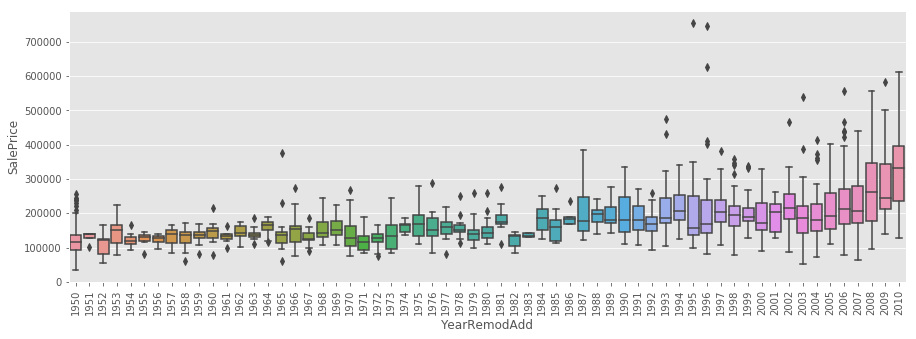

In [92]:
plt.rcParams['figure.figsize'] = 15,5
sns.boxplot( x=df_train["YearRemodAdd"], y=df_train["SalePrice"] ) 
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = 5,5

### RoofStyle vs. SalePrice

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

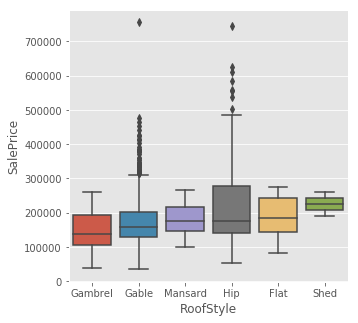

In [94]:
orderIdx = df_train.groupby("RoofStyle").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["RoofStyle"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### RoofMatl vs SalePrice
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

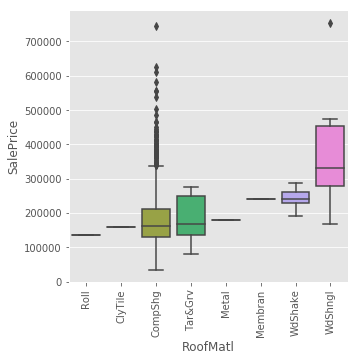

In [96]:
orderIdx = df_train.groupby("RoofMatl").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["RoofMatl"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### Exterior1st, Exterior2nd vs. SalePrice
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

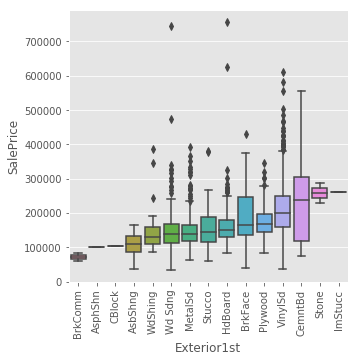

In [97]:
orderIdx = df_train.groupby("Exterior1st").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Exterior1st"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### MasVnrType vs. SalePrice
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

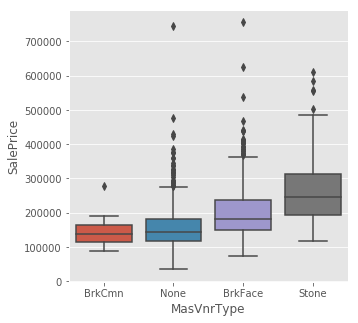

In [99]:
orderIdx = df_train.groupby("MasVnrType").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["MasVnrType"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### MasVnrArea vs. SalePrice
MasVnrArea: Masonry veneer area in square feet

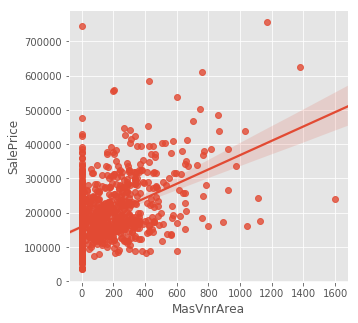

In [100]:
sns.regplot(x="MasVnrArea", y="SalePrice", data=df_train)

### ExterQual vs. SalePrice
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

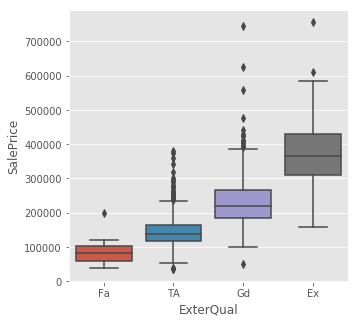

In [101]:
orderIdx = df_train.groupby("ExterQual").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["ExterQual"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### ExterCond vs. SalePrice
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

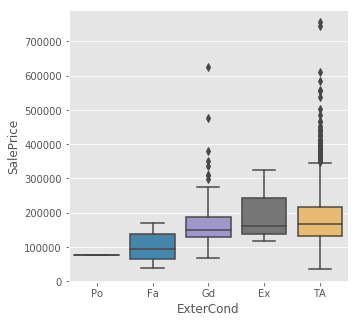

In [102]:
orderIdx = df_train.groupby("ExterCond").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["ExterCond"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

# As long as the condition above average, it didn't affect the price.

### Foundation vs. SalePrice

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		

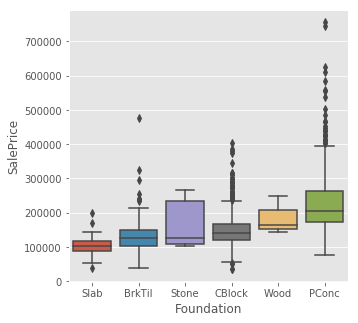

In [103]:
orderIdx = df_train.groupby("Foundation").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Foundation"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtQual vs. SalePrice
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

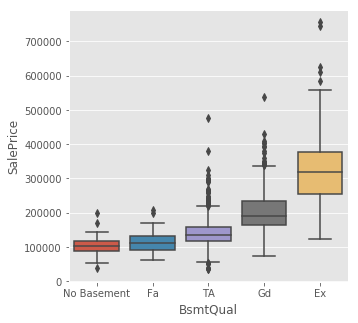

In [108]:
df_train["BsmtQual"] =  df_train["BsmtQual"].fillna("No Basement")
orderIdx = df_train.groupby("BsmtQual").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtQual"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtCond vs. SalePrice
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

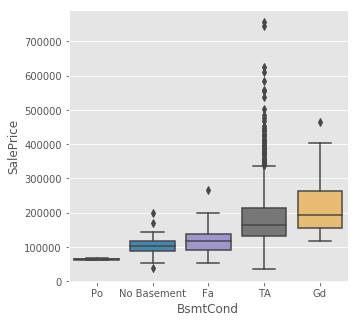

In [109]:
df_train["BsmtCond"] =  df_train["BsmtCond"].fillna("No Basement")
orderIdx = df_train.groupby("BsmtCond").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtCond"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtExposure vs. SalePrice
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	

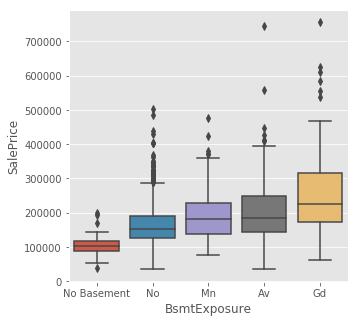

In [110]:
df_train["BsmtExposure"] =  df_train["BsmtExposure"].fillna("No Basement")
orderIdx = df_train.groupby("BsmtExposure").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtExposure"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtFinType1, BsmtFinType2 vs. SalePrice
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

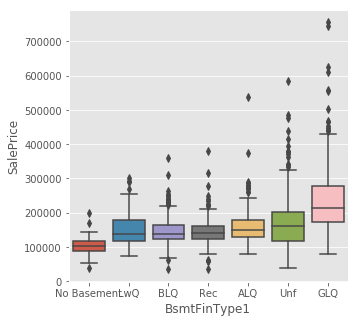

In [111]:
df_train["BsmtFinType1"] =  df_train["BsmtFinType1"].fillna("No Basement")
orderIdx = df_train.groupby("BsmtFinType1").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtFinType1"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtFinSF1 vs. SalePrice
BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

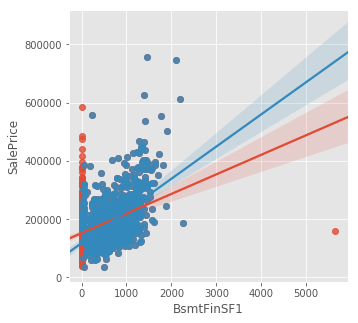

In [119]:
sns.regplot(x="BsmtFinSF1", y="SalePrice", data= df_train  )
sns.regplot(x="BsmtFinSF1", y="SalePrice", data= df_train[ (df_train["BsmtFinSF1"] < 3000 ) & (df_train["BsmtFinSF1"] > 0)]  )

### BsmtUnfSF vs. SalePrice
BsmtUnfSF: Unfinished square feet of basement area

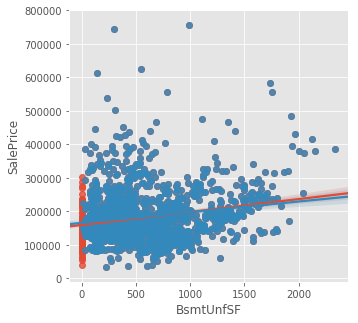

In [121]:
sns.regplot(x="BsmtUnfSF", y="SalePrice", data= df_train  )
sns.regplot(x="BsmtUnfSF", y="SalePrice", data= df_train[df_train["BsmtUnfSF"] > 0]  )

### TotalBsmtSF vs. SalePrice
TotalBsmtSF: Total square feet of basement area

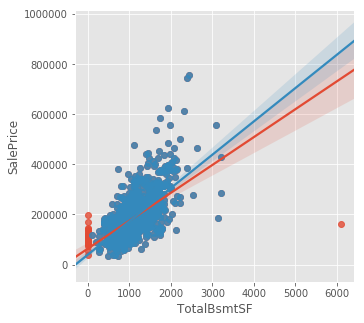

In [124]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data= df_train  )
sns.regplot(x="TotalBsmtSF", y="SalePrice", data= df_train[(df_train["TotalBsmtSF"] > 0) & (df_train["TotalBsmtSF"] < 5000)]  )

### Heating vs. SalePrice

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

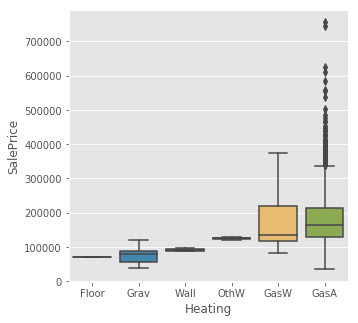

In [125]:
orderIdx = df_train.groupby("Heating").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Heating"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### HeatingQC vs. SalePrice
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

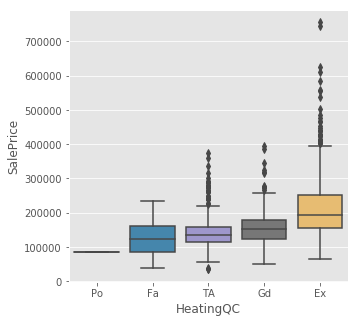

In [126]:
orderIdx = df_train.groupby("HeatingQC").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["HeatingQC"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### CentralAir vs. SalePrice
CentralAir: Central air conditioning

       N	No
       Y	Yes

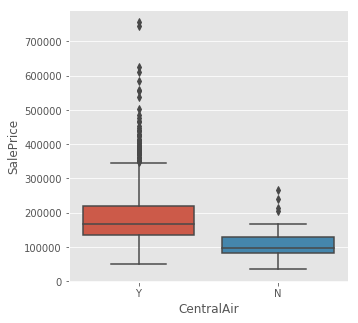

In [127]:
sns.boxplot( x=df_train["CentralAir"], y=df_train["SalePrice"] )

### Electrical vs. SalePrice
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

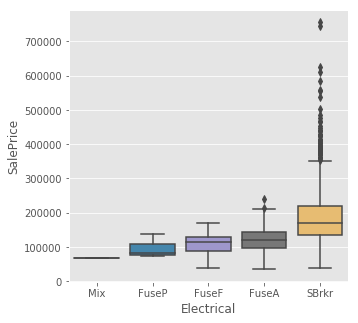

In [128]:
orderIdx = df_train.groupby("Electrical").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Electrical"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### 1stFlrSF,  2ndFlrSF vs. SalePrice
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

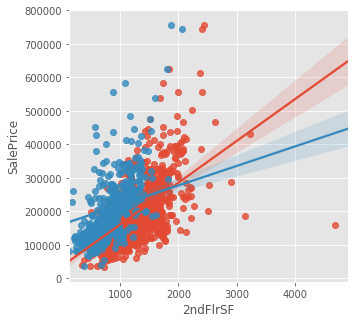

In [130]:
sns.regplot(x="1stFlrSF", y="SalePrice", data= df_train  )
sns.regplot(x="2ndFlrSF", y="SalePrice", data= df_train  )

### LowQualFinSF vs. SalePrice
LowQualFinSF: Low quality finished square feet (all floors)

Does this one have strong impact?

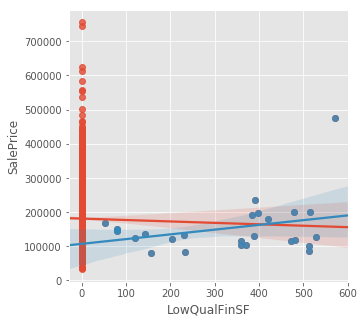

In [132]:
sns.regplot(x="LowQualFinSF", y="SalePrice", data= df_train  )
sns.regplot(x="LowQualFinSF", y="SalePrice", data= df_train[df_train["LowQualFinSF"] > 0]  )

### GrLivArea vs. SalePrice

GrLivArea: Above grade (ground) living area square feet

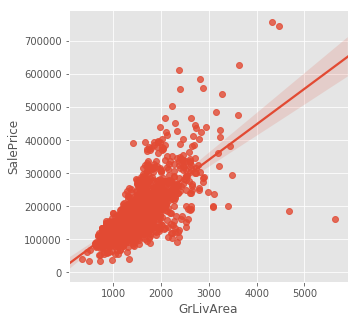

In [134]:
sns.regplot(x="GrLivArea", y="SalePrice", data= df_train  )

### BsmtFullBath vs. SalePrice
BsmtFullBath: Basement full bathrooms

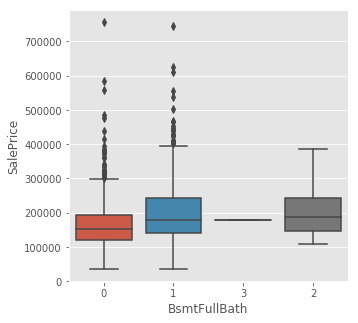

In [135]:
orderIdx = df_train.groupby("BsmtFullBath").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtFullBath"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### BsmtHalfBath vs. SalePrice
BsmtHalfBath: Basement half bathrooms

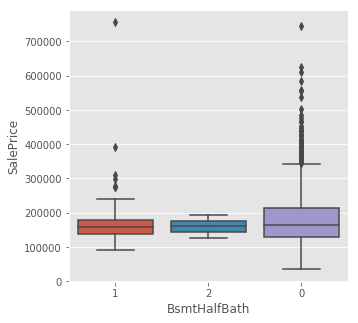

In [136]:
orderIdx = df_train.groupby("BsmtHalfBath").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["BsmtHalfBath"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### FullBath vs. SalePrice
FullBath: Full bathrooms above grade

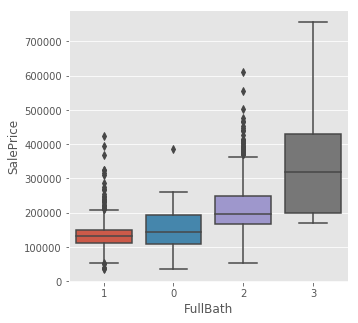

In [137]:
orderIdx = df_train.groupby("FullBath").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["FullBath"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### HalfBath vs. SalePrice
HalfBath: Half baths above grade

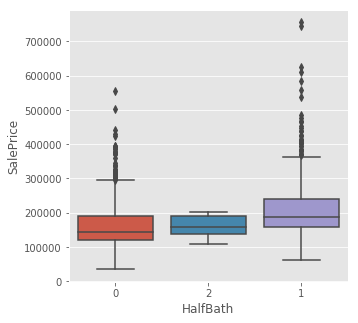

In [138]:
orderIdx = df_train.groupby("HalfBath").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["HalfBath"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### Bedroom vs. SalePrice
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

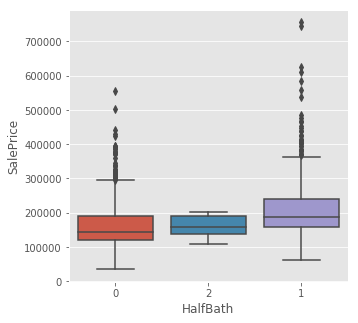

In [139]:
orderIdx = df_train.groupby("HalfBath").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["HalfBath"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### KitchenAbvGr vs. SalePrice
KitchenAbvGr: Kitchens above grade

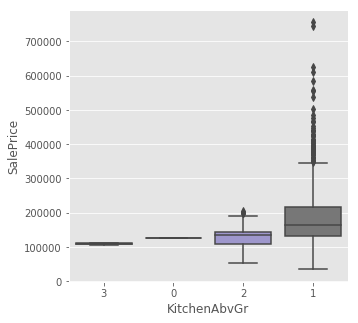

In [141]:
orderIdx = df_train.groupby("KitchenAbvGr").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["KitchenAbvGr"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### KitchenQual vs. SalePrice
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

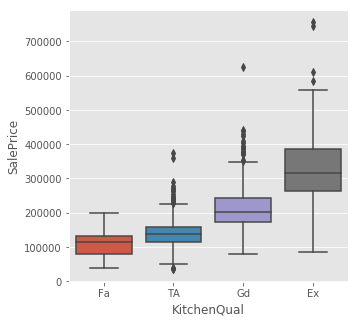

In [142]:
orderIdx = df_train.groupby("KitchenQual").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["KitchenQual"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### TotRmsAbvGrd vs. SalePrice
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

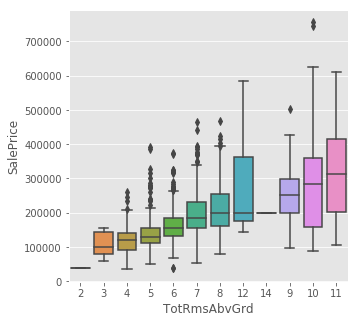

In [143]:
orderIdx = df_train.groupby("TotRmsAbvGrd").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["TotRmsAbvGrd"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### Functional vs. SalePrice
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

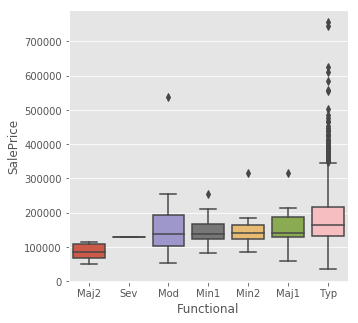

In [144]:
orderIdx = df_train.groupby("Functional").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Functional"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### Fireplaces vs. SalePrice
Fireplaces: Number of fireplaces

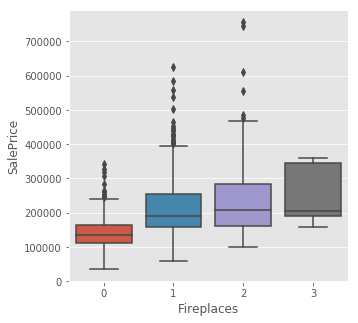

In [145]:
sns.boxplot( x=df_train["Fireplaces"], y=df_train["SalePrice"] ) 

### FireplaceQu vs. SalePrice
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

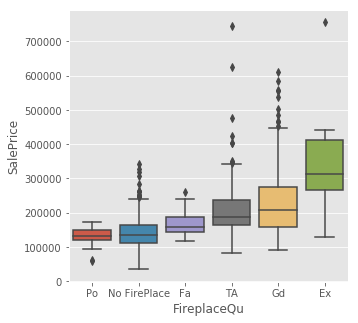

In [146]:
df_train["FireplaceQu"] =  df_train["FireplaceQu"].fillna("No FirePlace")
orderIdx = df_train.groupby("FireplaceQu").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["FireplaceQu"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### GarageType vs. SalePrice
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

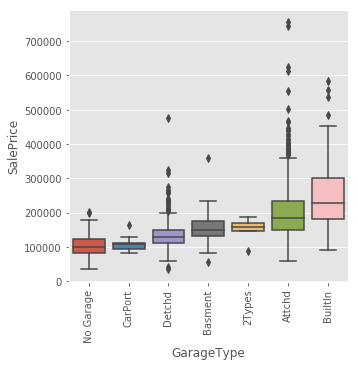

In [148]:
df_train["GarageType"] =  df_train["GarageType"].fillna("No Garage")
orderIdx = df_train.groupby("GarageType").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["GarageType"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### GarageYrBlt vs. SalePrice

GarageYrBlt: Year garage was built

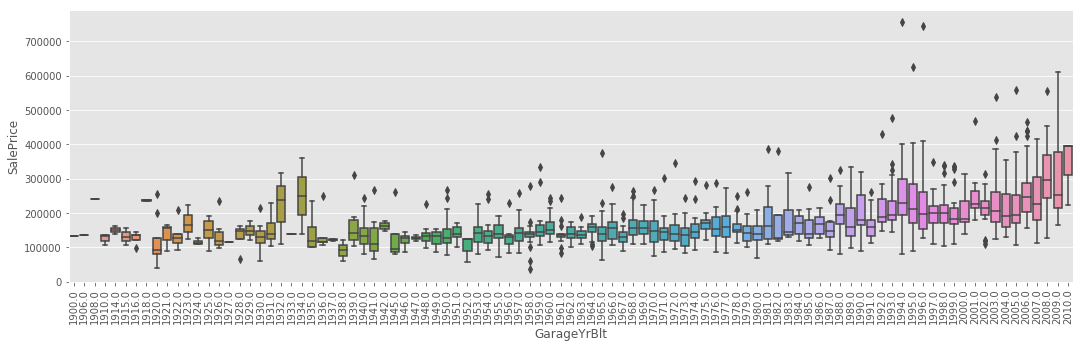

In [152]:
plt.rcParams['figure.figsize'] = 18,5
sns.boxplot( x=df_train["GarageYrBlt"], y=df_train["SalePrice"]) 
plt.xticks(rotation=90)
plt.show()
plt.rcParams['figure.figsize'] = 5,5

### GarageFinish vs. SalePrice
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

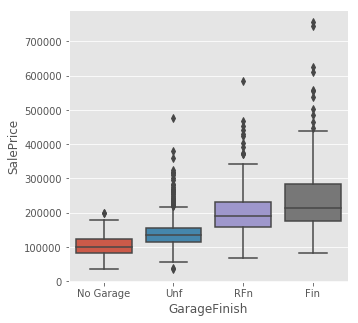

In [154]:
df_train["GarageFinish"] =  df_train["GarageFinish"].fillna("No Garage")
orderIdx = df_train.groupby("GarageFinish").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["GarageFinish"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### GarageCars vs. SalePrice
GarageCars: Size of garage in car capacity

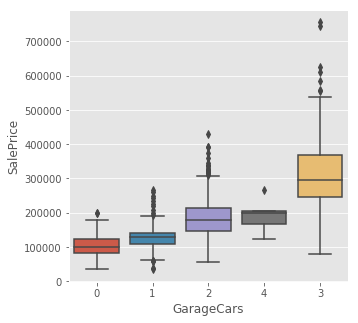

In [155]:
orderIdx = df_train.groupby("GarageCars").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["GarageCars"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### GarageArea vs. SalePrice
GarageArea: Size of garage in square feet

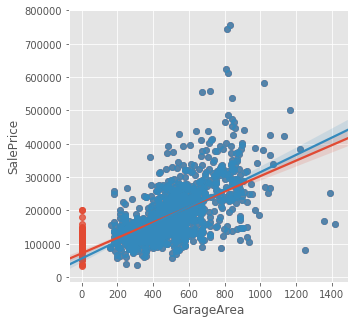

In [157]:
sns.regplot(x="GarageArea", y="SalePrice", data= df_train  )
sns.regplot(x="GarageArea", y="SalePrice", data= df_train[df_train["GarageArea"] > 0]  )

### GarageQual vs. SalePrice

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

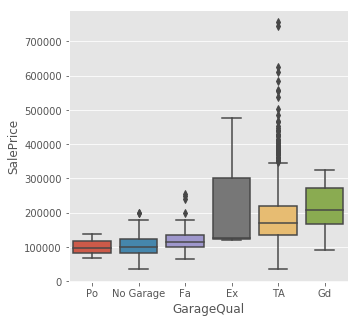

In [159]:
df_train["GarageQual"] =  df_train["GarageQual"].fillna("No Garage")

orderIdx = df_train.groupby("GarageQual").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["GarageQual"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### GarageCond vs. SalePrice
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

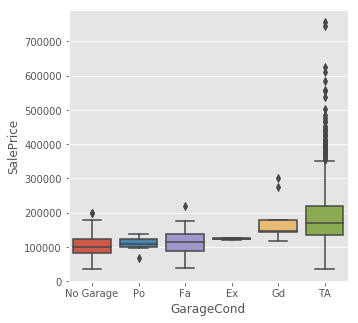

In [160]:
df_train["GarageCond"] =  df_train["GarageCond"].fillna("No Garage")

orderIdx = df_train.groupby("GarageCond").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["GarageCond"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### PavedDrive vs. SalePrice
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

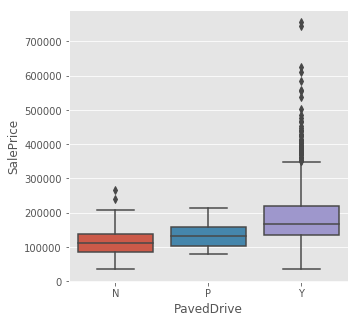

In [161]:
df_train["PavedDrive"] =  df_train["PavedDrive"].fillna("No Garage")

orderIdx = df_train.groupby("PavedDrive").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["PavedDrive"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### WoodDeckSF vs. SalePrice
WoodDeckSF: Wood deck area in square feet

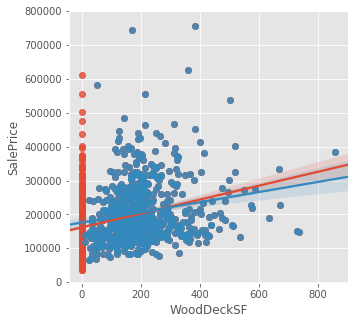

In [163]:
sns.regplot(x="WoodDeckSF", y="SalePrice", data= df_train  )
sns.regplot(x="WoodDeckSF", y="SalePrice", data= df_train[df_train["WoodDeckSF"] > 0]  )

### OpenPorchSF vs. SalePrice

OpenPorchSF: Open porch area in square feet

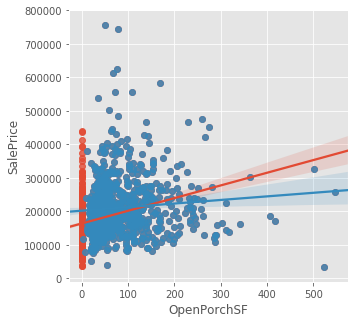

In [164]:
sns.regplot(x="OpenPorchSF", y="SalePrice", data= df_train  )
sns.regplot(x="OpenPorchSF", y="SalePrice", data= df_train[df_train["OpenPorchSF"] > 0]  )

### EnclosedPorch vs. SalePrice
EnclosedPorch: Enclosed porch area in square feet

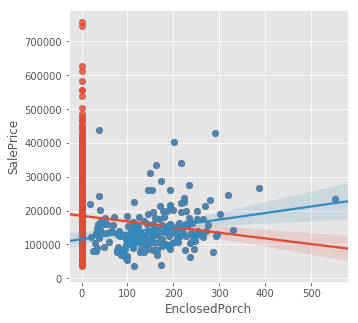

In [165]:
sns.regplot(x="EnclosedPorch", y="SalePrice", data= df_train  )
sns.regplot(x="EnclosedPorch", y="SalePrice", data= df_train[df_train["EnclosedPorch"] > 0]  )

### 3SsnPorch vs. SalePrice
3SsnPorch: Three season porch area in square feet

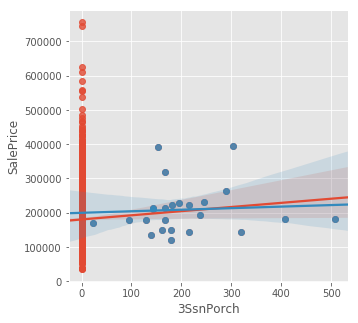

In [167]:
sns.regplot(x="3SsnPorch", y="SalePrice", data= df_train  )
sns.regplot(x="3SsnPorch", y="SalePrice", data= df_train[df_train["3SsnPorch"] > 0]  )

### ScreenPorch vs. SalePrice
ScreenPorch: Screen porch area in square feet

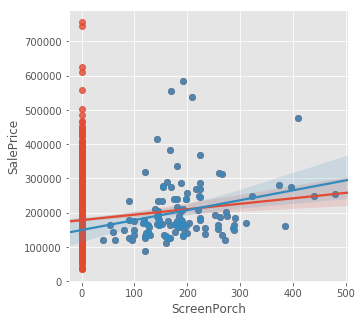

In [168]:
sns.regplot(x="ScreenPorch", y="SalePrice", data= df_train  )
sns.regplot(x="ScreenPorch", y="SalePrice", data= df_train[df_train["ScreenPorch"] > 0]  )

### PoolArea vs. SalePrice
PoolArea: Pool area in square feet


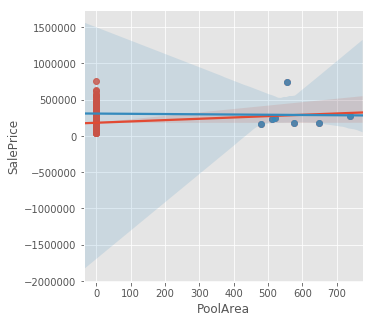

In [169]:
sns.regplot(x="PoolArea", y="SalePrice", data= df_train  )
sns.regplot(x="PoolArea", y="SalePrice", data= df_train[df_train["PoolArea"] > 0]  )

### PoolQC vs. SalePrice
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

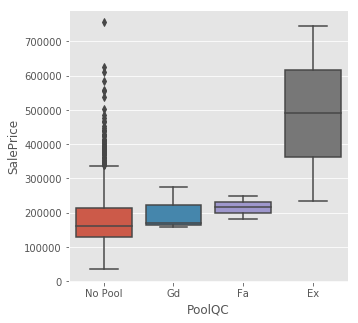

In [171]:
df_train["PoolQC"] =  df_train["PoolQC"].fillna("No Pool")
orderIdx = df_train.groupby("PoolQC").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["PoolQC"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### Fence vs. SalePrice
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

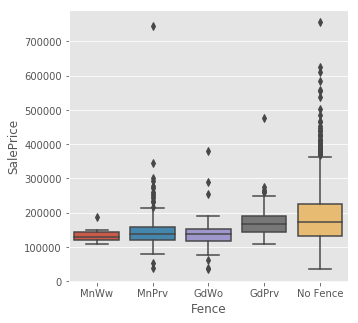

In [172]:
df_train["Fence"] =  df_train["Fence"].fillna("No Fence")
orderIdx = df_train.groupby("Fence").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["Fence"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### MiscFeature vs. SalePrice
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

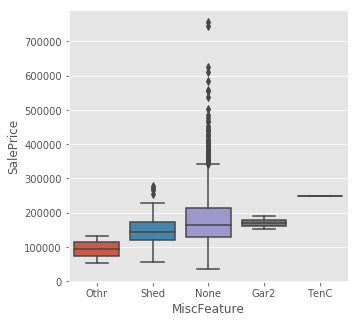

In [173]:
df_train["MiscFeature"] =  df_train["MiscFeature"].fillna("None")
orderIdx = df_train.groupby("MiscFeature").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["MiscFeature"], y=df_train["SalePrice"], order=orderIdx ) 
plt.show()

### MiscVal vs. SalePrice
MiscVal: $Value of miscellaneous feature

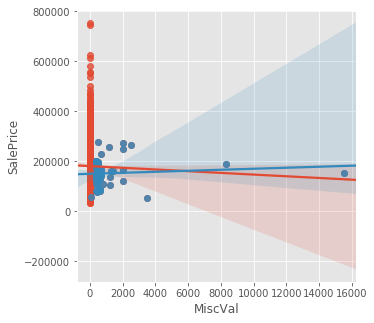

In [174]:
sns.regplot(x="MiscVal", y="SalePrice", data= df_train  )
sns.regplot(x="MiscVal", y="SalePrice", data= df_train[df_train["MiscVal"] > 0]  )

### Sold Month vs. SalePrice
MoSold: Month Sold (MM)
YrSold: Year Sold (YYYY)

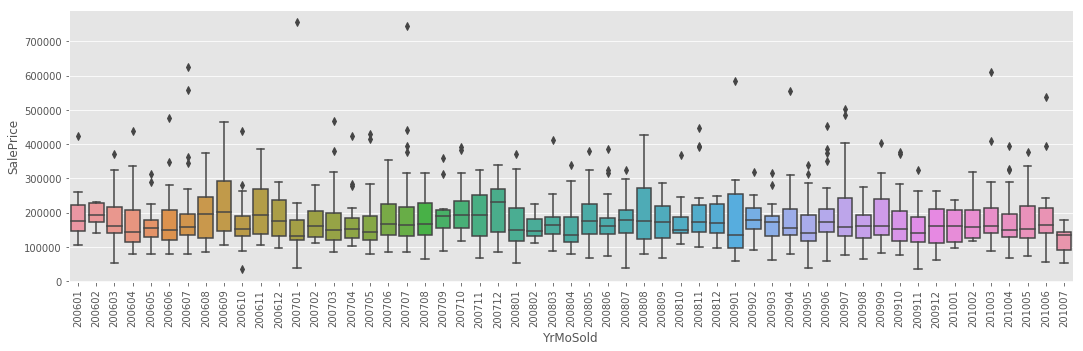

In [207]:
plt.rcParams['figure.figsize'] = 18,5
df_train['YrMoSold'] =  df_train['YrSold'].astype(str) + df_train['MoSold'].astype(str).str.zfill(2)
sns.boxplot( x=df_train["YrMoSold"], y=df_train["SalePrice"] )
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = 5,5

### SaleType vs. SalePrice
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

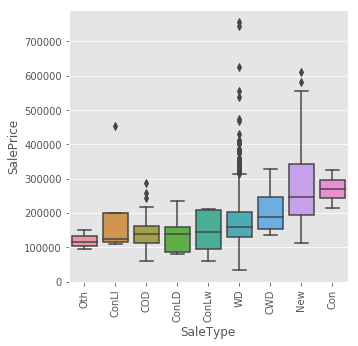

In [176]:
orderIdx = df_train.groupby("SaleType").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["SaleType"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()

### SaleCondition vs. SalePrice
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

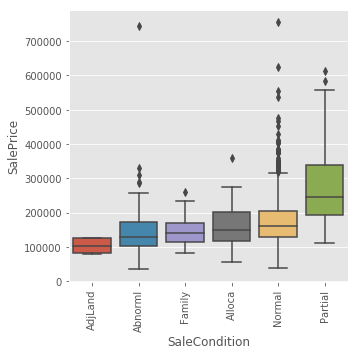

In [177]:
orderIdx = df_train.groupby("SaleCondition").agg({"SalePrice":"median"}).sort_values("SalePrice").index
sns.boxplot( x=df_train["SaleCondition"], y=df_train["SalePrice"], order=orderIdx ) 
plt.xticks(rotation=90)
plt.show()